# Normal 01c - THM concentration in tap water - JAGS version

# _Josep Fortiana_   &emsp;&emsp;&emsp;&emsp;&emsp;      2023-03-21

****
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cdf{\operatorname{cdf}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\diag{\operatorname{diag}}$
$\def\dprod{\displaystyle\prod}$
$\def\dsum{\displaystyle\sum}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\cZ{\cal Z}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\invgammadist{\operatorname{InvGamma}}$
$\def\invwishartdist{\operatorname{InvWishart}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\newcommand{\KL}[2]{\operatorname{KL}(\mkern2mu#1\mkern2mu\mathrel\mid\mathrel{\mkern-8mu}\mid\mkern2mu#2\mkern2mu)}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\def\median{\operatorname{median}}$
$\DeclareMathOperator{\thetaltinomialdist}{Multinomial}$
$\DeclareMathOperator{\thetaltinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\Normaldist{\operatorname{MNormal}}$
$\def\pdf{\operatorname{pdf}}$
$\def\pmf{\operatorname{pmf}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{\operatorname{P}}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\u{\mathbb{1}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

# Case study: THM concentrations ($ \sigma$ known)

This problem appears in the [Web course _Bayesian Statistics for Epidemiologists_](http://www.columbia.edu/~cjd11/charles_dimaggio/DIRE/styled-4/styled-11/code-4/), 
also in Lunn _et al._ (2012) _The BUGS book,_ **Example 3.3.3.** pp. 43-45.

# Problem description and data

Regional water companies in the UK are required to take routine measurements of trihalomethane (THM) concentrations in tap water samples for regulatory purposes.
Samples are tested throughout the year in each water supply zone and analysed using an assay with known measurement error having standard deviation
$ \sigma = 5\theta g/L$. We want to learn about the average concentration in a particular zone based on $n=2$  independent measurements, $x_{1}=128 \mu g/L$ and $x_{2}=132\mu g/L$; hence their 
mean, is $\overline{x}=130\mu g/L$.

What is the best estimate of the mean concentration $\mu$?

Suppose the water company will be fined if observed THM levels in the water supply exceed $145\mu g/L$. What is the probability of this event?

In [1]:
n<-2
xbar<-130
sigma<-5

# Bayesian approach

## Likelihood

Here we assume normal data: each of the $ n=2$ measurements $x_{i}$, $i=1,2$, is a value from a $\normaldist(\mu,\sigma^{2})$ and they are independent.

Their mean $\xbar=\dfrac{x_{1}+x_{2}}{2}$ is, then, a value from a $\normaldist\big(\mu,\dfrac{\sigma^{2}}{2}\big)$.

## Prior

Suppose historical data on THM levels in other zones supplied from the same water source showed that the mean THM concentration was $120\theta g/L$ with standard
deviation $ 10\theta g/L$. This suggests a $\normaldist(120, 10^{2})$ prior for $\mu$.

We encode this information as a normal prior distribution for $\mu$, with mean $\theta=120$ and standard deviation $\gamma=10$.

$$
    \mu\sim\normaldist(\theta,\gamma^{2}), \mskip50mu \theta=120, \mskip50mu \gamma=10.
$$

## Specify model

$$
     \begin{array}{lcll}
     x_{i}  &\sim &\normaldist(\mu,\sigma^{2}),\mskip30mu 1\leq i\leq n,&\mskip60mu\text{Observed data,}\\[0.3cm]
     \mu &\sim &\normaldist(\theta,\gamma^{2}),                              &\mskip60mu\text{Prior.}
          \end{array}
$$

In [2]:
theta<-120
gamma<-10

# Model with an unknown variance

$ n$ iid normal observations, $x=(x_{1},\dots,x_{n})$,  with unknown variance but known expectation, assumed $0$:

## Likelihood

<body><h3 style=color:rgb(255,0,0)>
    
$p(x\CondTo\psi)=(2\pi)^{-n/2}\cdot \psi^{n/2}\cdot \exp\left\{ -\dfrac{n\,s^{2}}{2}\cdot \psi\right\}$.

$ \psi=\dfrac{1}{\sigma^{2}}$ is the _precision,_ and $s^{2}=\dfrac{1}{n}\,\dsum_{i=1}^{n}x_{i}^{2}$ is the empirical variance.
</h3></body>

## Prior

Conjugate prior for the precision $ \psi$ is a $\gammadist(\alpha,\beta)$ pdf.

$$
    p(\psi\CondTo\alpha,\beta)=\dfrac{\beta^{\alpha}}{\Gamma(\alpha)}\cdot\psi^{\alpha-1}\cdot\exp\{-\beta\,\psi\}.
$$

In terms of the variance, $\sigma^{2}=\dfrac{1}{\psi}\sim\invgammadist(\alpha,\beta)$.

# Treatment with JAGS and R2jags

In [3]:
#install.packages("R2jags",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(R2jags,quietly=TRUE)

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




In [4]:
THM.dat<-list(n=2, x=c(128, 132), theta=120,sigma.squared=25,n0=0.25, x.crit=145)

This $ n_{0}$ is here just to follow Lunn et al. By definition,

$$
    \gamma^{2}=10^{2}=100=\dfrac{\sigma^{2}}{n_{0}}=\dfrac{5^{2}}{n_{0}} =\dfrac{25}{n_{0}}\mskip30mu \Rightarrow\mskip30mu n{0}=1/4=0.25.
$$

### Note: JAGS parametrizes the normal pdf  as `dnorm(<mean>,<precision>)`  where `<precision>=1/<variance>`.

In [5]:
cat(
    "model {
        for (i in 1:n) {
        x[i] ~ dnorm(mu, inv.sigma.squared)  
        }
    mu ~ dnorm(theta, inv.gamma.squared)
    inv.sigma.squared <- 1/sigma.squared
    inv.gamma.squared <- n0/sigma.squared
    x.pred ~ dnorm(mu, inv.sigma.squared)         # This to simulate the posterior predictive pdf
    P.crit <- step(x.pred - x.crit)               # And to compute the probability of fine
    }"
    ,file="THM.jag")

I'm using here a quite large `n.iter` to approximately reproduce _The BUGS book,_ pp. 43-45.

In [6]:
THM.m1<-jags(data=THM.dat, n.chains=3, n.iter = 100000, n.thin = 50,
        parameters.to.save=c("mu","x.pred","P.crit"), 
        model.file="THM.jag")

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 2
   Total graph size: 14

Initializing model



In [7]:
print(THM.m1)

Inference for Bugs model at "THM.jag", fit using jags,
 3 chains, each with 1e+05 iterations (first 50000 discarded), n.thin = 50
 n.sims = 3000 iterations saved
         mu.vect sd.vect    2.5%     25%     50%     75%   97.5%  Rhat n.eff
P.crit     0.004   0.063   0.000   0.000   0.000   0.000   0.000 1.039  3000
mu       128.854   3.319 122.357 126.568 128.811 131.103 135.480 1.002  1900
x.pred   128.818   5.926 117.548 124.767 128.869 132.879 140.536 1.001  2400
deviance  11.420   1.340  10.435  10.542  10.881  11.759  15.399 1.002  2900

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 0.9 and DIC = 12.3
DIC is an estimate of expected predictive error (lower deviance is better).


The JAGS-computed default value `n.thin=50` seems somewhat overdone (it means we are keeping one term in 50 from each sequence and throwing out the other 49). 

The goal is to diminish short lag autocorrelations, thus an evaluation of the autocorrelation function, either the autocorrelation plot or, still better, a significance test, should guide the choice of `n.thin` (actually I don't know the internals of how JAGS does this computation, so it may well happen it is Ok).

Additionally, the _thinning_ method itself is debatable. There are recent papers (last 2 years) in opposition to its use: they contend that, if the reason why autocorrelation is "bad" is that the amount of information contributed by each new sample point is smaller than that in an independent sample, then the solution is taking a larger sample, not thinning.

I will try here another run with a more moderate `n.thin=10`.

In [8]:
THM.m2<-jags(data=THM.dat, n.chains=3, n.iter = 100000, n.thin = 10,
        parameters.to.save=c("mu","x.pred","P.crit"), 
        model.file="THM.jag")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 2
   Total graph size: 14

Initializing model



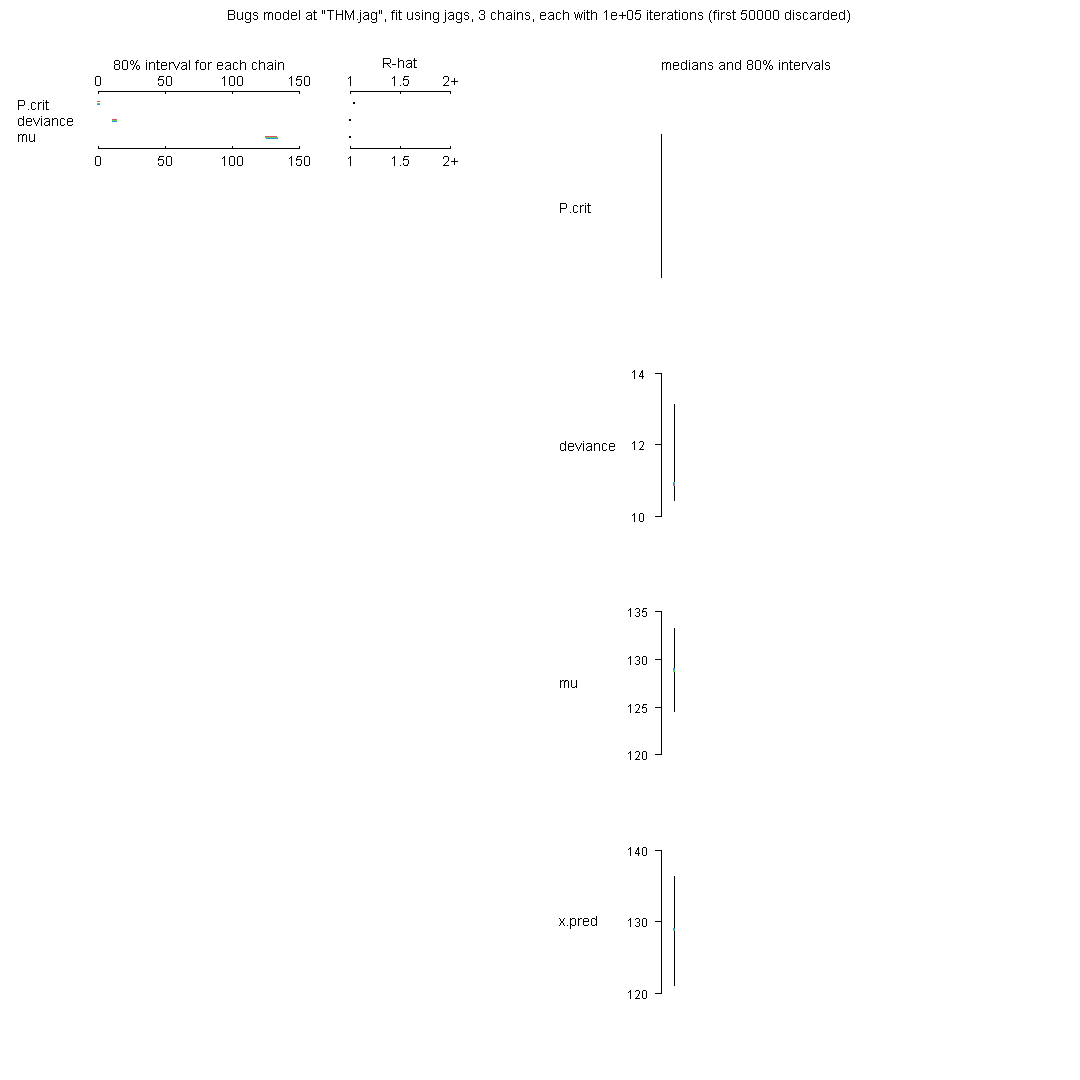

In [9]:
options(repr.plot.width=9,repr.plot.height=9)
plot(THM.m1)

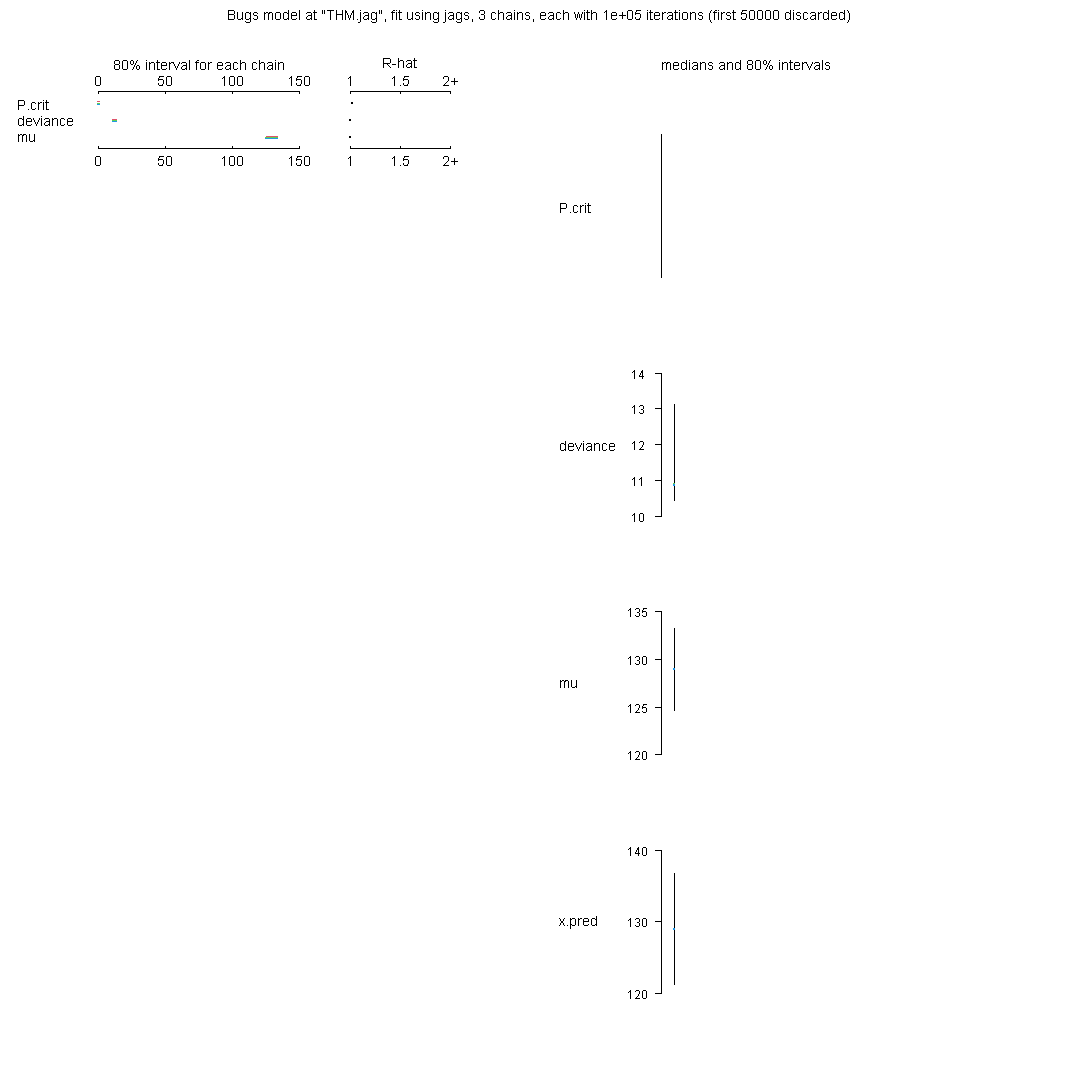

In [10]:
options(repr.plot.width=9,repr.plot.height=9)
plot(THM.m2)

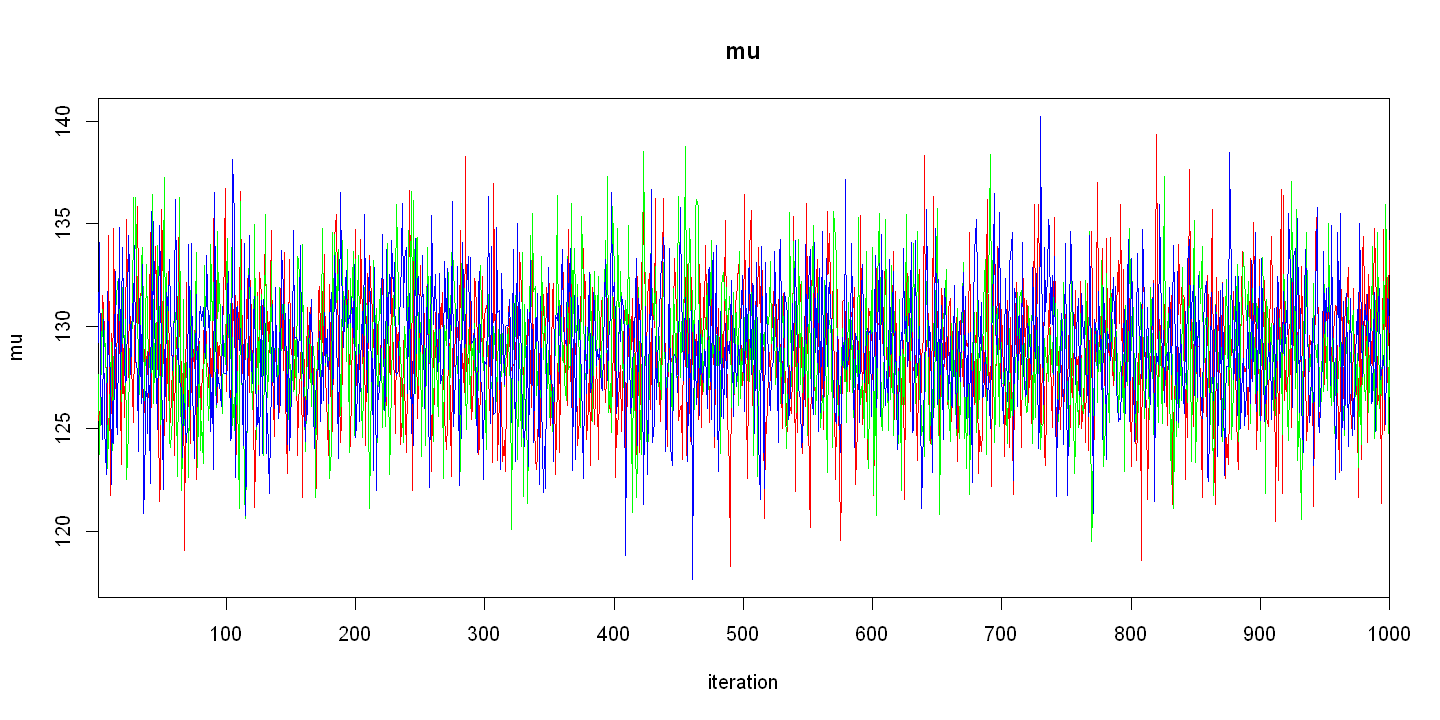

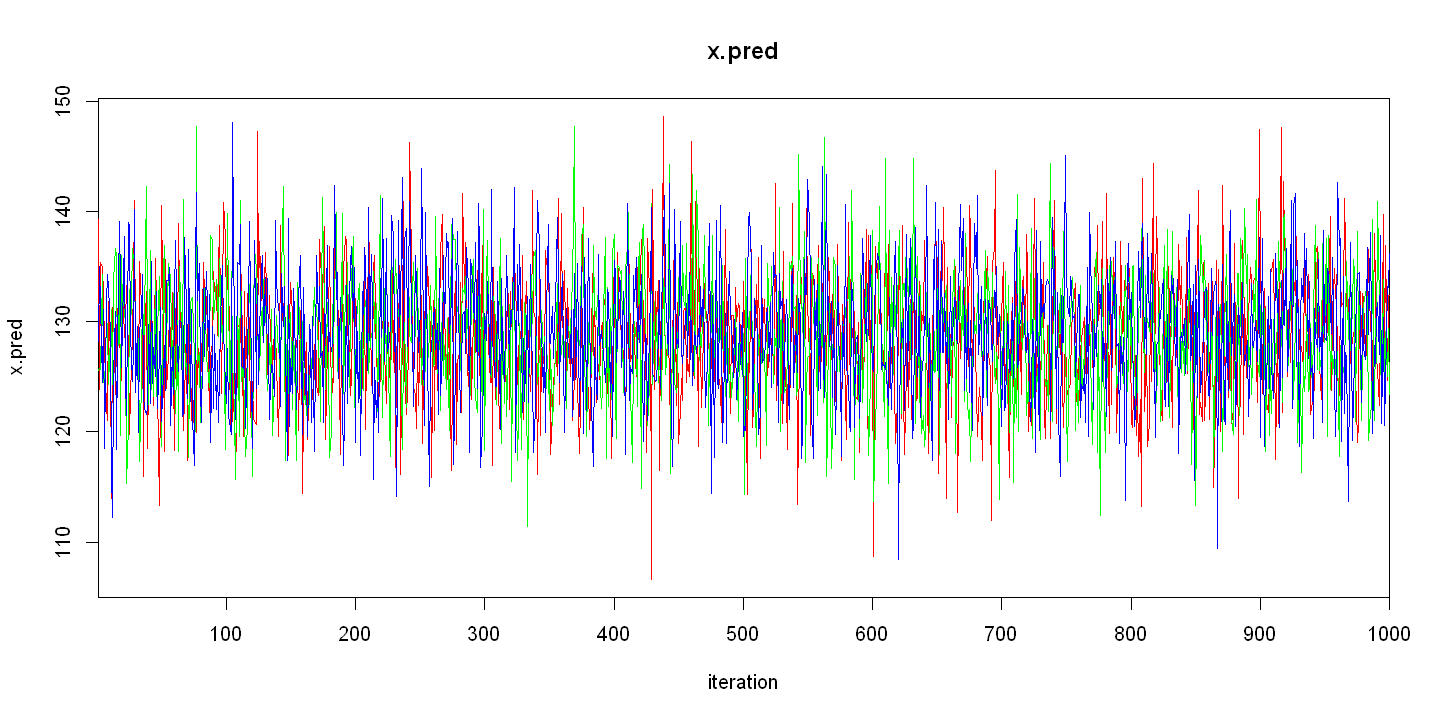

In [11]:
options(repr.plot.width=12,repr.plot.height=6)
traceplot(THM.m1,varname=c("mu","x.pred"))

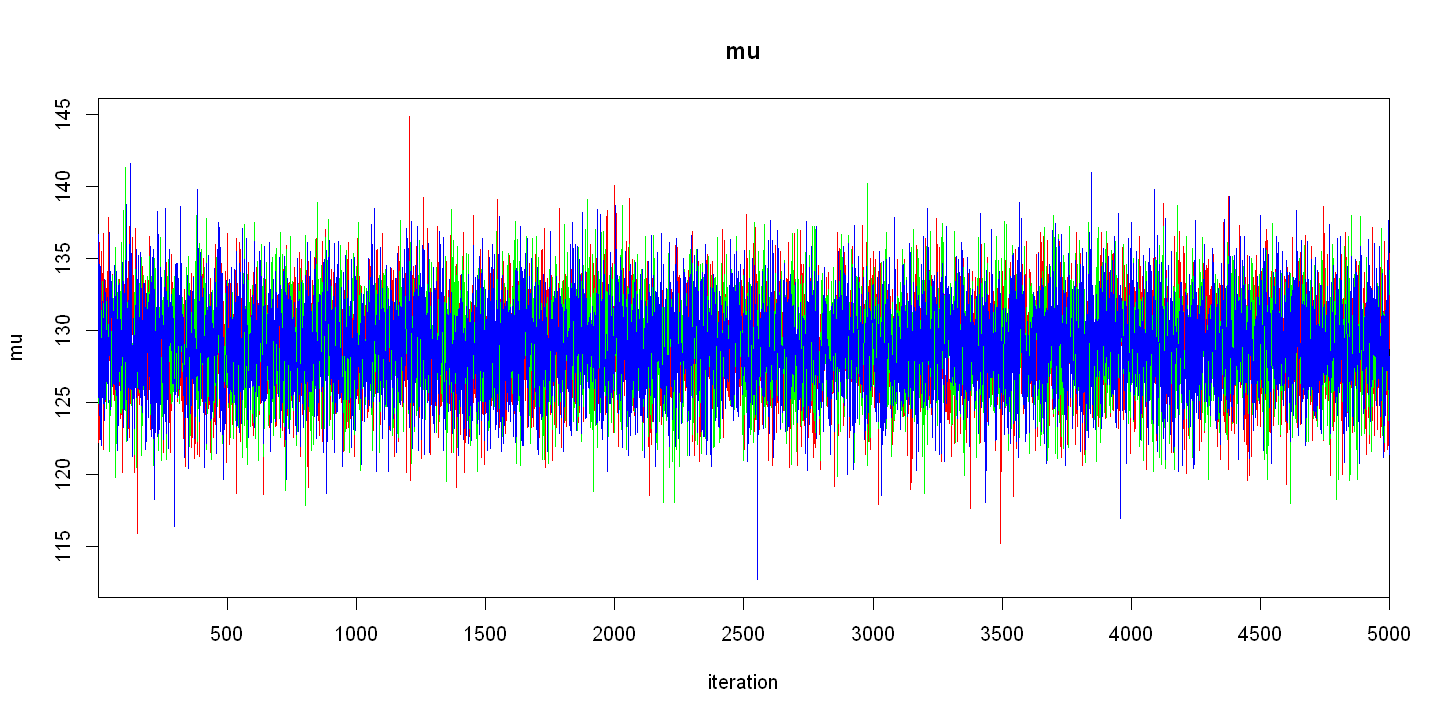

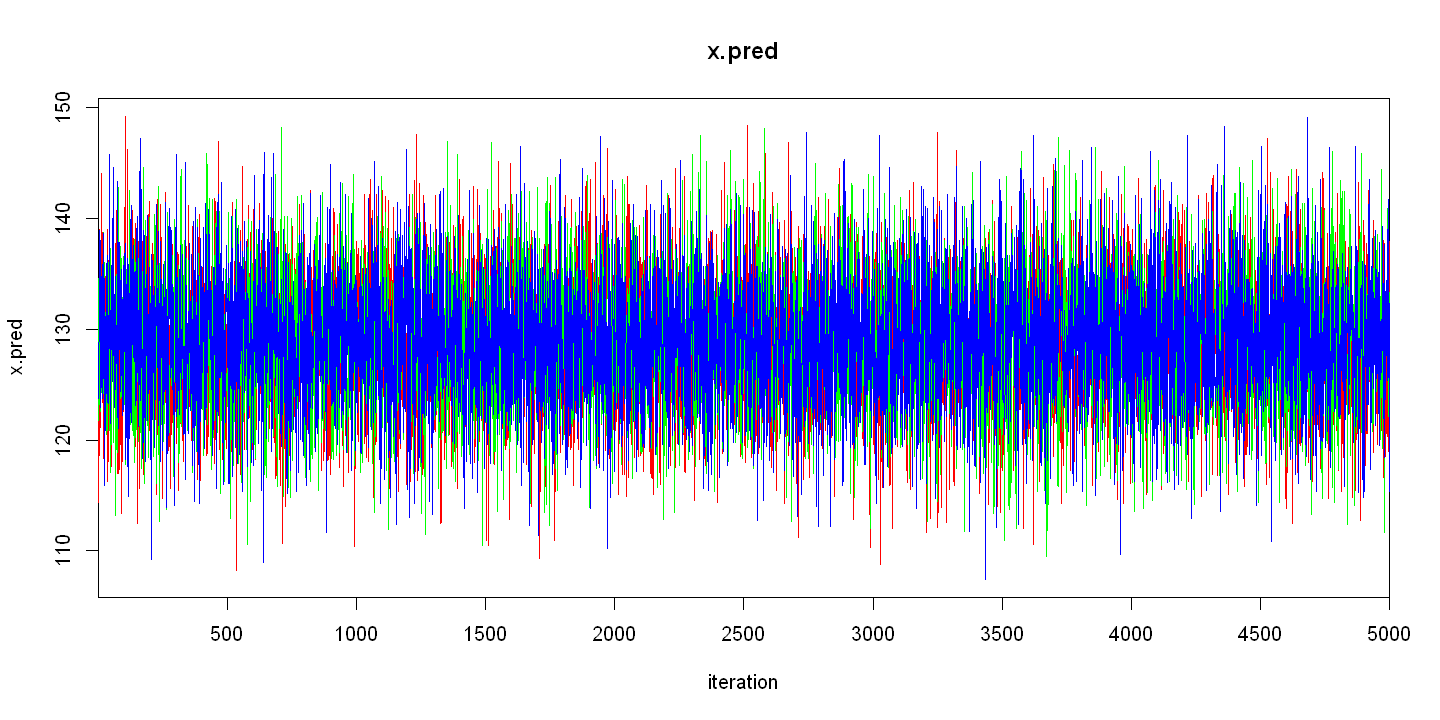

In [12]:
options(repr.plot.width=12,repr.plot.height=6)
traceplot(THM.m2,varname=c("mu","x.pred"))

## Convert to an mcmc object for further diagnostics

In [13]:
#install.packages("coda",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(coda,quietly=TRUE)

In [14]:
THM.01.mcmc<-as.mcmc(THM.m1)
summary(THM.01.mcmc)


Iterations = 50001:99951
Thinning interval = 50 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean      SD Naive SE Time-series SE
deviance  11.420 1.33975 0.024460       0.024459
mu       128.854 3.31910 0.060598       0.058293
P.crit     0.004 0.06313 0.001153       0.001375
x.pred   128.818 5.92571 0.108188       0.107030

2. Quantiles for each variable:

           2.5%    25%    50%    75% 97.5%
deviance  10.43  10.54  10.88  11.76  15.4
mu       122.36 126.57 128.81 131.10 135.5
P.crit     0.00   0.00   0.00   0.00   0.0
x.pred   117.55 124.77 128.87 132.88 140.5


In [15]:
THM.02.mcmc<-as.mcmc(THM.m2)
summary(THM.02.mcmc)


Iterations = 50001:99991
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean      SD  Naive SE Time-series SE
deviance 1.142e+01 1.39216 0.0113669      0.0115786
mu       1.289e+02 3.33767 0.0272520      0.0272534
P.crit   4.067e-03 0.06364 0.0005196      0.0005327
x.pred   1.289e+02 6.03141 0.0492463      0.0476617

2. Quantiles for each variable:

           2.5%    25%    50%    75%  97.5%
deviance  10.43  10.53  10.87  11.73  15.32
mu       122.37 126.67 128.94 131.18 135.47
P.crit     0.00   0.00   0.00   0.00   0.00
x.pred   117.13 124.84 128.91 132.98 141.00


In [16]:
str(THM.01.mcmc)

List of 3
 $ : 'mcmc' num [1:1000, 1:4] 11.2 13.6 10.8 10.6 10.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "deviance" "mu" "P.crit" "x.pred"
  ..- attr(*, "mcpar")= num [1:3] 50001 99951 50
 $ : 'mcmc' num [1:1000, 1:4] 10.9 13.5 11.4 10.5 10.7 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "deviance" "mu" "P.crit" "x.pred"
  ..- attr(*, "mcpar")= num [1:3] 50001 99951 50
 $ : 'mcmc' num [1:1000, 1:4] 10.5 11.8 11 12.9 10.4 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "deviance" "mu" "P.crit" "x.pred"
  ..- attr(*, "mcpar")= num [1:3] 50001 99951 50
 - attr(*, "class")= chr "mcmc.list"


In [17]:
str(THM.02.mcmc)

List of 3
 $ : 'mcmc' num [1:5000, 1:4] 11.4 10.8 15.4 14.9 10.4 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "deviance" "mu" "P.crit" "x.pred"
  ..- attr(*, "mcpar")= num [1:3] 50001 99991 10
 $ : 'mcmc' num [1:5000, 1:4] 11.9 12.5 10.9 10.5 11.6 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "deviance" "mu" "P.crit" "x.pred"
  ..- attr(*, "mcpar")= num [1:3] 50001 99991 10
 $ : 'mcmc' num [1:5000, 1:4] 10.5 14 12.2 10.4 13.2 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "deviance" "mu" "P.crit" "x.pred"
  ..- attr(*, "mcpar")= num [1:3] 50001 99991 10
 - attr(*, "class")= chr "mcmc.list"


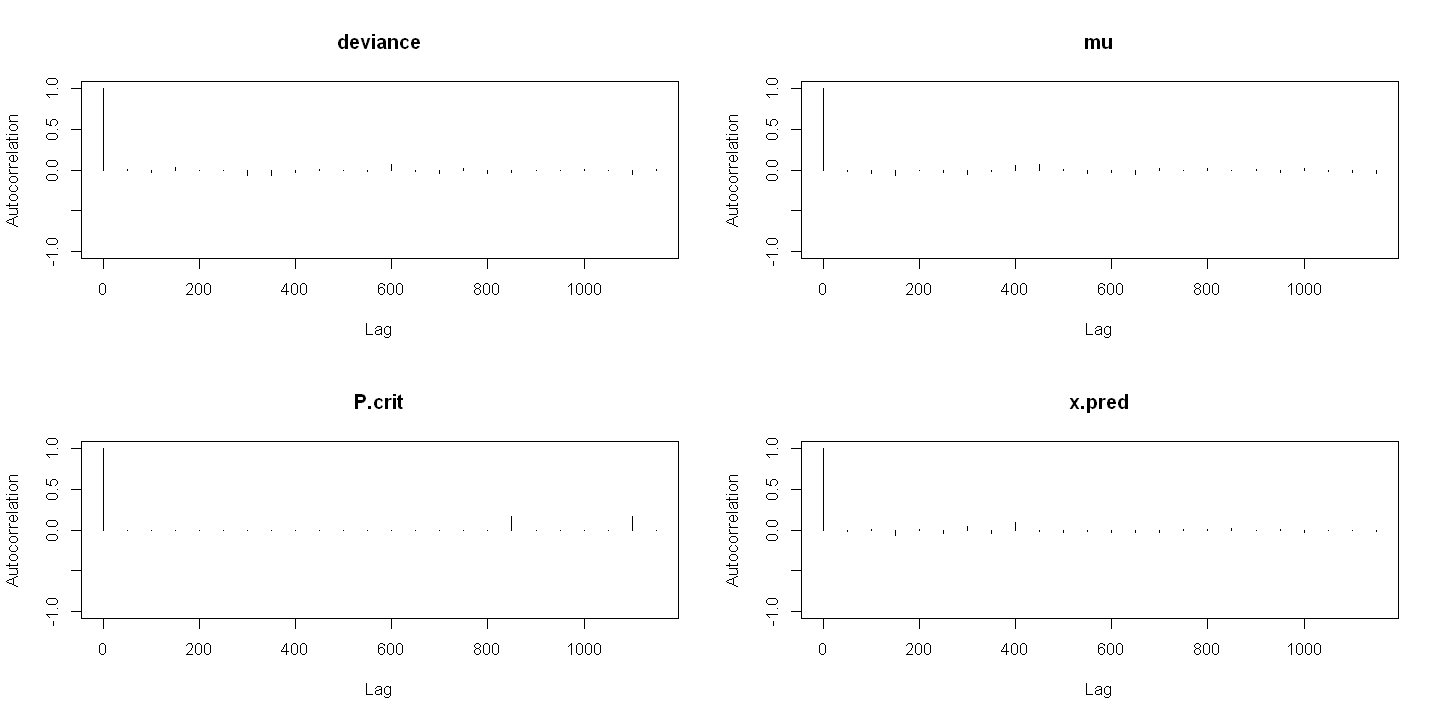

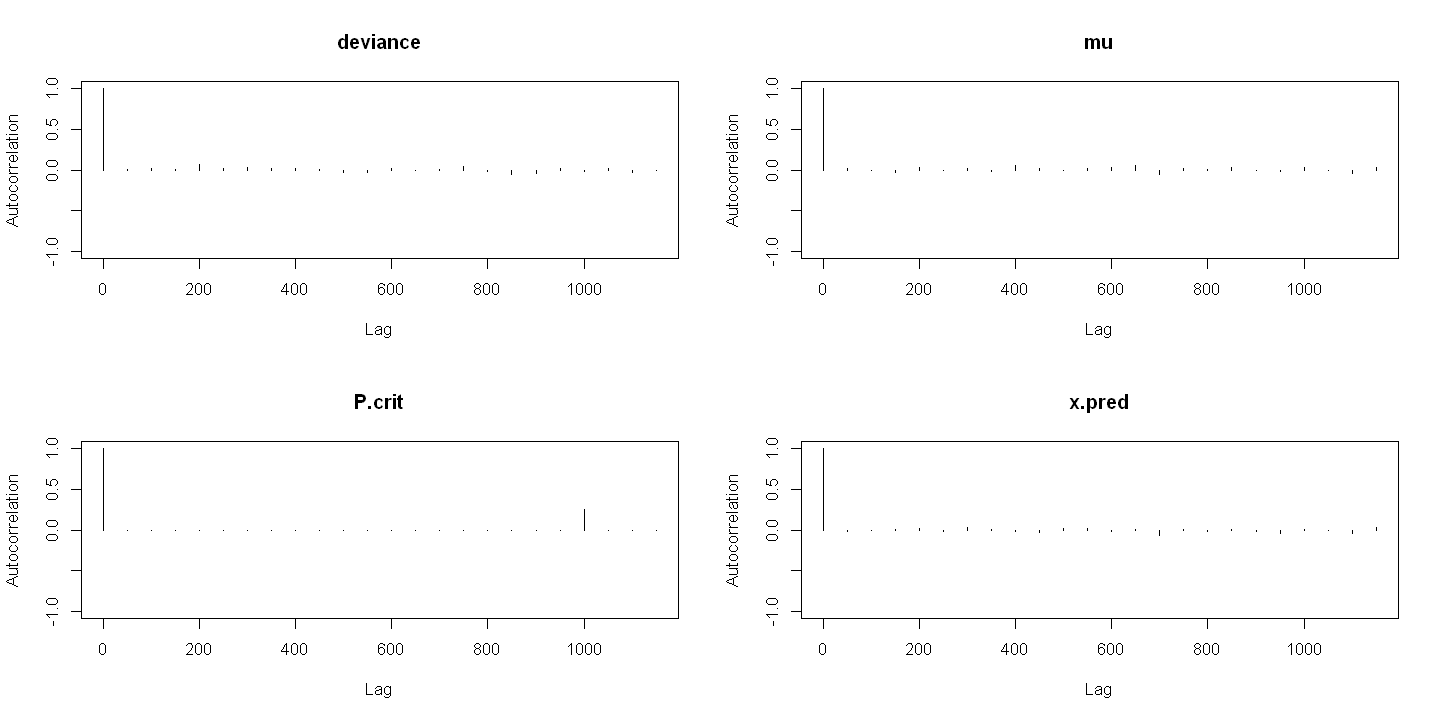

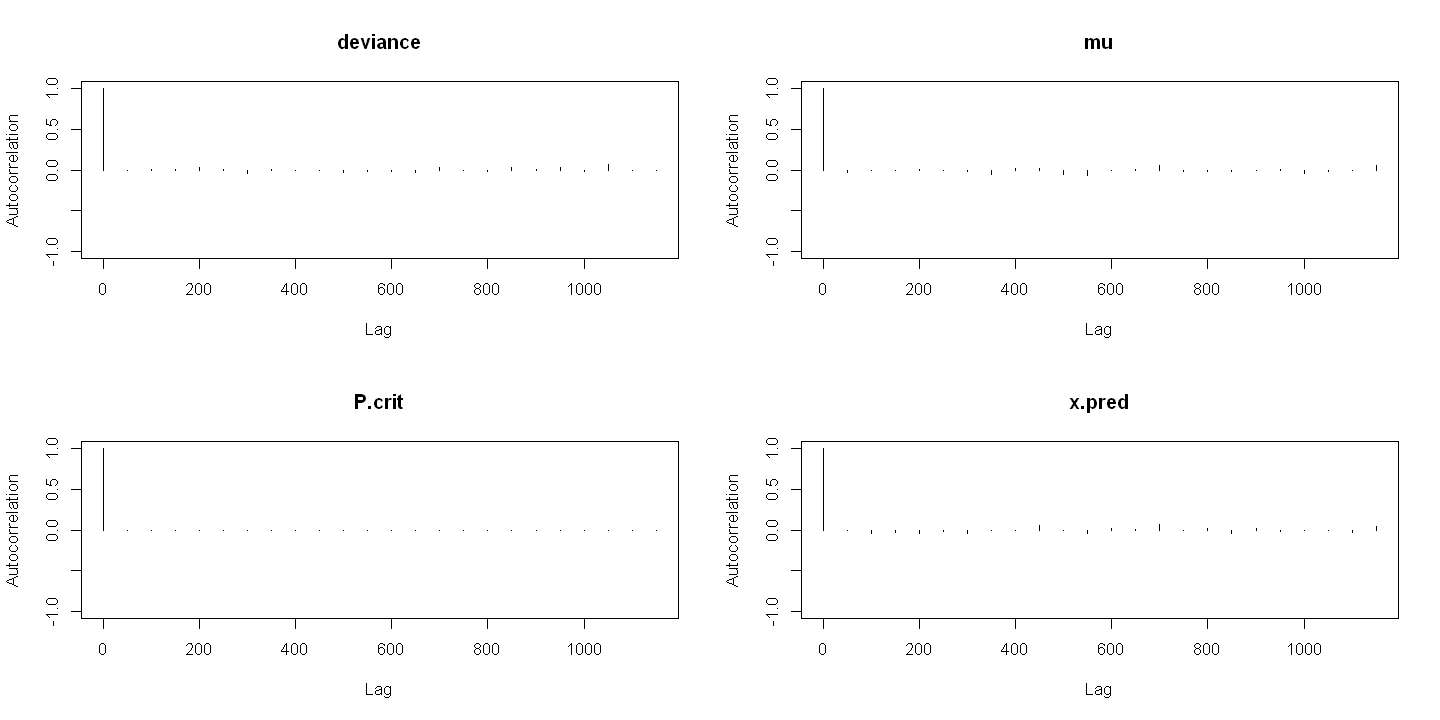

In [18]:
options(repr.plot.width=12,repr.plot.height=6)
autocorr.plot(THM.01.mcmc)

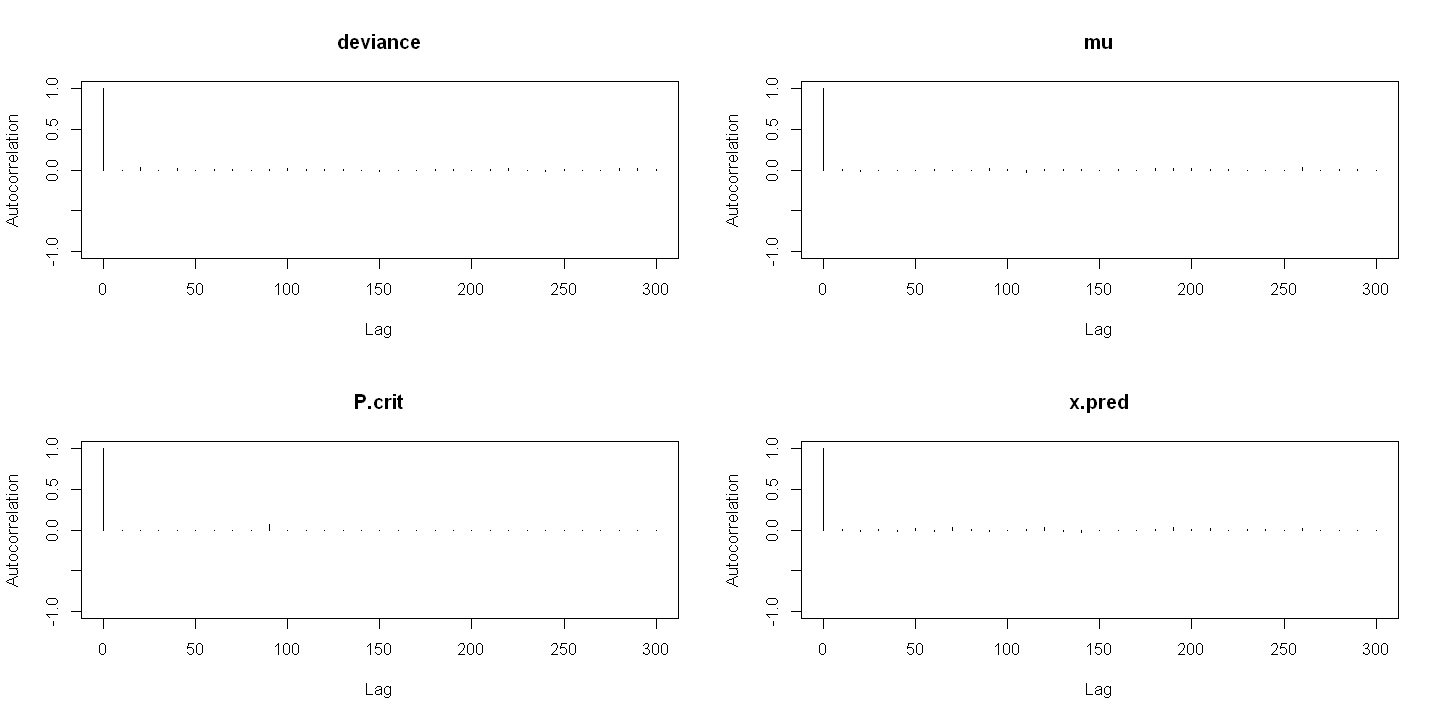

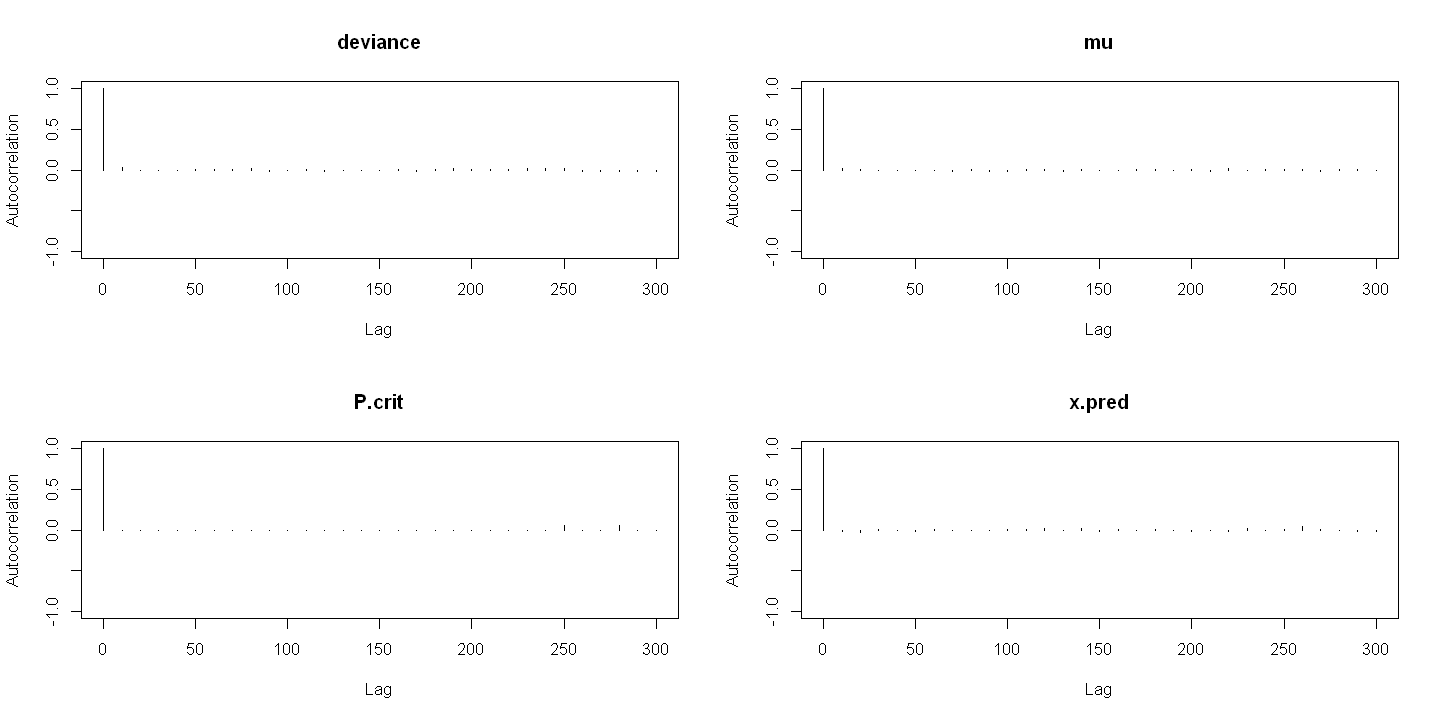

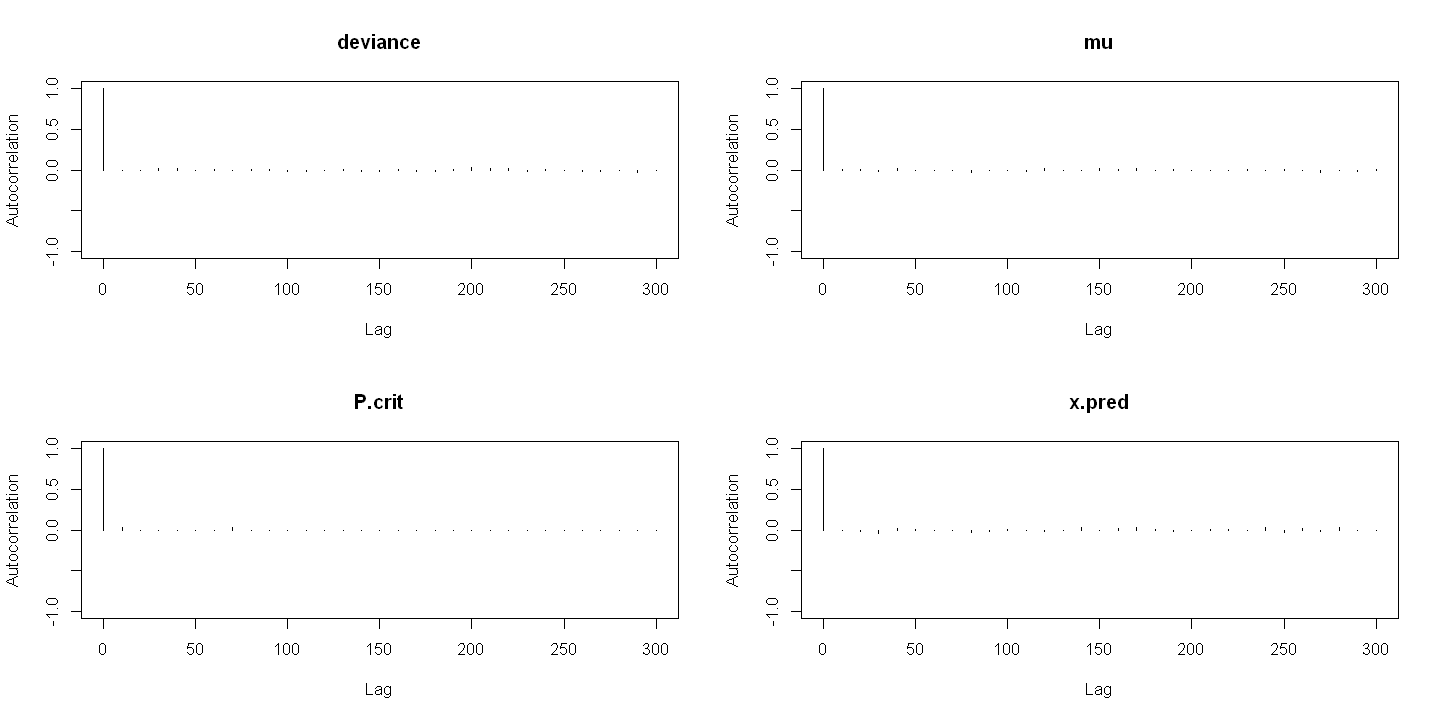

In [19]:
options(repr.plot.width=12,repr.plot.height=6)
autocorr.plot(THM.02.mcmc)

### Conclusion: I would say `n.thin=10` is enough. 

Even a smaller value could be tried.

## Make a sample of $\mu$, joining the three chains

In [20]:
mu.post.01<-c(THM.01.mcmc[[1]][,2],THM.01.mcmc[[2]][,2],THM.01.mcmc[[3]][,2])
str(mu.post.01)

 num [1:3000] 127 124 128 131 131 ...


In [21]:
mu.post.02<-c(THM.02.mcmc[[1]][,2],THM.02.mcmc[[2]][,2],THM.02.mcmc[[3]][,2])
str(mu.post.02)

 num [1:15000] 133 128 122 122 130 ...


## Make a sample of $x_{\text{pred}}$, joining the three chains

In [22]:
x.pred.post.01<-c(THM.01.mcmc[[1]][,4],THM.01.mcmc[[2]][,4],THM.01.mcmc[[3]][,4])
str(x.pred.post.01)

 num [1:3000] 139 124 135 135 133 ...


In [23]:
x.pred.post.02<-c(THM.02.mcmc[[1]][,4],THM.02.mcmc[[2]][,4],THM.02.mcmc[[3]][,4])
str(x.pred.post.02)

 num [1:15000] 133 129 114 123 125 ...


## Posterior $\mu$ mean, sd, variance, estimates

In [24]:
mu.post.01.mean<-mean(mu.post.01)
mu.post.01.sd<-sd(mu.post.01)
mu.post.01.var<-var(mu.post.01)
cat(sprintf("Post mu mean = %6.4f, Post mu sd = %6.4f, Post mu var = %6.4f",
   mu.post.01.mean,mu.post.01.sd,mu.post.01.var))

Post mu mean = 128.8541, Post mu sd = 3.3191, Post mu var = 11.0164

In [25]:
mu.post.02.mean<-mean(mu.post.02)
mu.post.02.sd<-sd(mu.post.02)
mu.post.02.var<-var(mu.post.02)
cat(sprintf("Post mu mean = %6.4f, Post mu sd = %6.4f, Post mu var = %6.4f",
   mu.post.02.mean,mu.post.02.sd,mu.post.02.var))

Post mu mean = 128.9364, Post mu sd = 3.3377, Post mu var = 11.1401

## Posterior prediction $x_{\text{pred}}$ mean, sd, variance, estimates

In [26]:
x.pred.post.01.mean<-mean(x.pred.post.01)
x.pred.post.01.sd<-sd(x.pred.post.01)
x.pred.post.01.var<-var(x.pred.post.01)
cat(sprintf("Post x.pred mean = %6.4f, Post x.pred sd = %6.4f, Post x.pred var = %6.4f",
   x.pred.post.01.mean,x.pred.post.01.sd,x.pred.post.01.var))

Post x.pred mean = 128.8181, Post x.pred sd = 5.9257, Post x.pred var = 35.1141

In [27]:
x.pred.post.02.mean<-mean(x.pred.post.02)
x.pred.post.02.sd<-sd(x.pred.post.02)
x.pred.post.02.var<-var(x.pred.post.02)
cat(sprintf("Post x.pred mean = %6.4f, Post x.pred sd = %6.4f, Post x.pred var = %6.4f",
   x.pred.post.02.mean,x.pred.post.02.sd,x.pred.post.02.var))

Post x.pred mean = 128.9390, Post x.pred sd = 6.0314, Post x.pred var = 36.3779

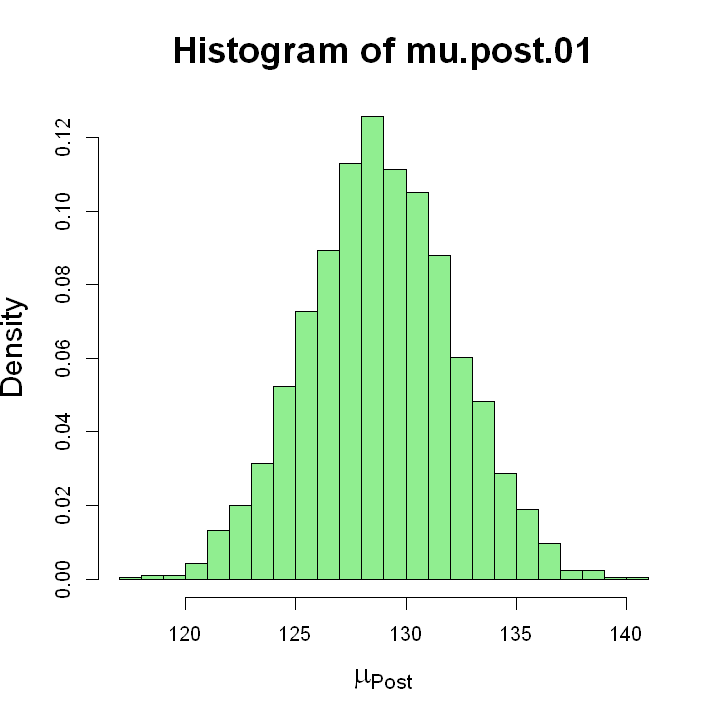

In [28]:
options(repr.plot.width=6,repr.plot.height=6)
hist(mu.post.01,freq=FALSE,col="LightGreen",nclass=20,xlab=expression(mu[Post]),cex.lab=1.5,cex.main=1.8)

In [29]:
x.crit<-145
sum(x.pred.post.01>x.crit)/length(x.pred.post.01)

[1] 0.004

## Theoretical posterior

The posterior distribution for $\mu$, given $\overline{x}$, is normal, with mean $\theta_{x}$ and sd $\tau$. 

$\theta_{x}$ is a convex combination of $\theta$ and $\xbar$.

$$
    (\mu\CondTo\xbar)\sim\normaldist(\theta_{x},\tau^{2}),
$$

In [30]:
alpha<-(sigma^2/n)/((sigma^2/n)+gamma^2)
theta.x<-alpha*theta+(1-alpha)*xbar
tau2<-((sigma^2/n)*gamma^2)/((sigma^2/n)+gamma^2)
tau<-sqrt(tau2)
round(theta.x,4)
round(tau2,4)
round(tau,4)

[1] 128.8889

[1] 11.1111

[1] 3.3333

## Comparison of prior, observed, and posterior pdf's

In [31]:
bayes.normal<-function(x,theta,sigma,gamma){
    lambda<-sigma^2/(sigma^2+gamma^2)
    theta.x<-lambda*theta+(1-lambda)*x
    tau2<-lambda*gamma^2
    tau<-sqrt(tau2)
    max.sigma<-max(sigma,gamma,tau)
    min.theta<-min(theta,x,theta.x)
    max.theta<-max(theta,x,theta.x)
    min.x<-min.theta-2.0*max.sigma
    max.x<-max.theta+2.0*max.sigma
    u<-seq(min.x,max.x,length=1000)
    prior<-dnorm(u,mean=theta,sd=gamma)
    obs<-dnorm(u,mean=x,sd=sigma)
    post<-dnorm(u,mean=theta.x,sd=tau)
    max.y<-max(prior,obs,post)
    plot(u,prior,type="l",lwd=3.0,ylim=c(0,max.y*1.1),col="green",
        xlab="",ylab="",main="Prior, observation and posterior",cex=3)
    lines(u,obs,lwd=2.5,col="blue")
    lines(u,post,lwd=2.5,col="red")
    legend("topleft",legend=list("Prior","Obs","Post"),lty="solid",lwd=2.5,col=c("green","blue","red"))
    }

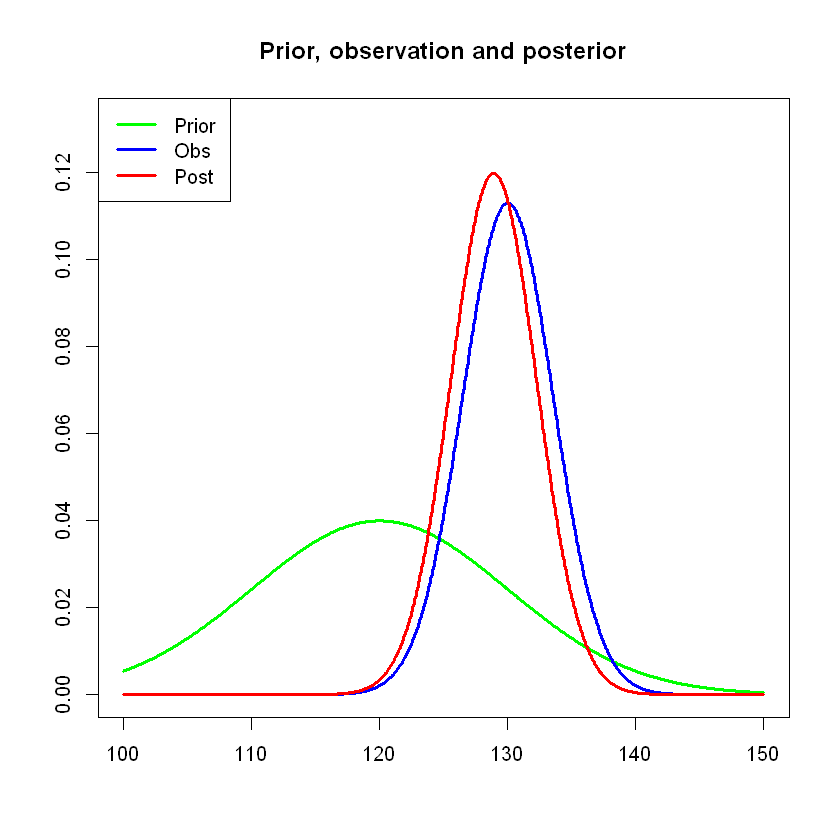

In [32]:
options(repr.plot.width=7,repr.plot.height=7)
bayes.normal(130,120,5/sqrt(2),10)

## Credible interval

With the posterior distribution for $\mu$, given $\overline{x}$,	we obtain the interval $(a,b)$, such that $P(a<\mu<b)=0.95$. This interval is centered on $\theta_{x}=128.9$ instead of on $\overline{x}=130$:

In [33]:
a<-qnorm(0.025,mean=theta.x,sd=tau)
b<-qnorm(0.975,mean=theta.x,sd=tau)
Credible.Int.95<-c(a,b)
round(Credible.Int.95,4)
#[1] 122.3557 135.4221

[1] 122.3557 135.4221

## Posterior predictive distribution

The posterior predictive distribution for a new observation $\widetilde{x}$, given the observed $\overline{x}$, is normal, with mean $\theta_{x}$ and variance the sum $\sigma^{2}+\tau^{2}$.

In [34]:
Theor.m.post.pred<-theta.x
Theor.var.post.pred<-sigma^2+tau^2
Theor.sd.post.pred<-sqrt(Theor.var.post.pred)
round(Theor.m.post.pred,3)
round(Theor.var.post.pred,3)
round(Theor.sd.post.pred,3)

[1] 128.889

[1] 36.111

[1] 6.009

## Predicting next semester probability of fine

This posterior predictive distribution can be used to compute the probability that the water company will be fined next semester, which will happen if next month measurement (predicted)  $\widetilde{𝑥}$  exceeds  $x_{\text{crit}}=145$.

In [35]:
p.fine<-1-pnorm(145,mean=Theor.m.post.pred,sd=Theor.sd.post.pred)
round(p.fine,5)
# [1] 0.003669567

[1] 0.00367